In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('data/air-passengers-carried.csv', parse_dates = ['Year'])

In [3]:
df.shape

(8189, 4)

In [4]:
df.sample(10)

,Entity,Code,Year,"Air transport, passengers carried"
5200,Nepal,NPL,2018-01-01,4.525805e+06
3976,Lesotho,LSO,1996-01-01,1.710000e+04
7673,United Kingdom,GBR,2001-01-01,7.033173e+07
5810,Paraguay,PRY,2011-01-01,8.453957e+05
7427,Tunisia,TUN,2005-01-01,1.996699e+06
7398,Tunisia,TUN,1976-01-01,8.093000e+05
6045,Qatar,QAT,1995-01-01,1.072500e+06
3330,Ireland,IRL,2013-01-01,9.340803e+07
3188,Indonesia,IDN,2008-01-01,2.976609e+07
1005,Burkina Faso,BFA,1989-01-01,1.315000e+05


In [5]:
df.isna().sum()

Entity                                 0
Code                                 669
Year                                   0
Air transport, passengers carried      0
dtype: int64

In [6]:
df[df['Code'].isna()].sample(15)

,Entity,Code,Year,"Air transport, passengers carried"
2934,High income,NaN,2017-01-01,2.322861e+09
2918,High income,NaN,2001-01-01,1.313774e+09
4187,Lower middle income,NaN,1988-01-01,5.859430e+07
4815,Middle income,NaN,1987-01-01,1.453200e+08
3859,Latin America and Caribbean,NaN,2006-01-01,1.104399e+08
3853,Latin America and Caribbean,NaN,2000-01-01,9.650757e+07
4789,Middle East and North Africa,NaN,2008-01-01,7.107088e+07
4216,Lower middle income,NaN,2017-01-01,4.517156e+08
4821,Middle income,NaN,1993-01-01,2.317531e+08
4844,Middle income,NaN,2016-01-01,1.471189e+09


In [7]:
df = df.sort_values(by = 'Year')

In [8]:
income_category = df[
    (df['Entity'] == 'Upper middle income') |
    (df['Entity'] == 'Lower middle income') |
    (df['Entity'] == 'Low and middle income') |
    (df['Entity'] == 'Up and middle income') |
    (df['Entity'] == 'Middle income') |
    (df['Entity'] == 'Low income') |
    (df['Entity'] == 'High income')
]

In [9]:
income_category

,Entity,Code,Year,"Air transport, passengers carried"
4126,Low income,NaN,1970-01-01,1820500.0
2887,High income,NaN,1970-01-01,271999296.0
4169,Lower middle income,NaN,1970-01-01,14146800.0
4170,Lower middle income,NaN,1971-01-01,13828400.0
2888,High income,NaN,1971-01-01,291581216.0
...,...,...,...,...
4219,Lower middle income,NaN,2020-01-01,203386176.0
4125,Low and middle income,NaN,2020-01-01,911243392.0
4848,Middle income,NaN,2020-01-01,903496192.0
4168,Low income,NaN,2020-01-01,7747177.5


In [10]:
income_category = income_category.reset_index(drop = True)

In [11]:
income_category.shape

(286, 4)

In [12]:
income_category['Entity'].value_counts()

Entity
High income              51
Lower middle income      51
Middle income            47
Upper middle income      47
Low and middle income    47
Low income               43
Name: count, dtype: int64

In [13]:
income_category.drop('Code', axis =1, inplace = True)

In [27]:
income_category['Year'] = income_category['Year'].dt.year

In [28]:
income_category.sample(3)

,Entity,Year,"Air transport, passengers carried",year
204,Upper middle income,2006,3.664351e+08,NaT
179,Upper middle income,2001,2.352727e+08,NaT
266,Middle income,2017,1.630801e+09,NaT


In [29]:
high_income = income_category[income_category['Entity'] == 'High income']
middle_income = income_category[income_category['Entity'] == 'Middle income']
low_income = income_category[income_category['Entity'] == 'Low income']
upper_middle_income = income_category[income_category['Entity'] == 'Upper middle income']
lower_middle_income = income_category[income_category['Entity'] == 'Lower middle income']
low_and_middle_income = income_category[income_category['Entity'] == 'Low and middle income']

Text(0.5, 1.0, 'No of Persenger visiting High Income countries from 1970-2020')

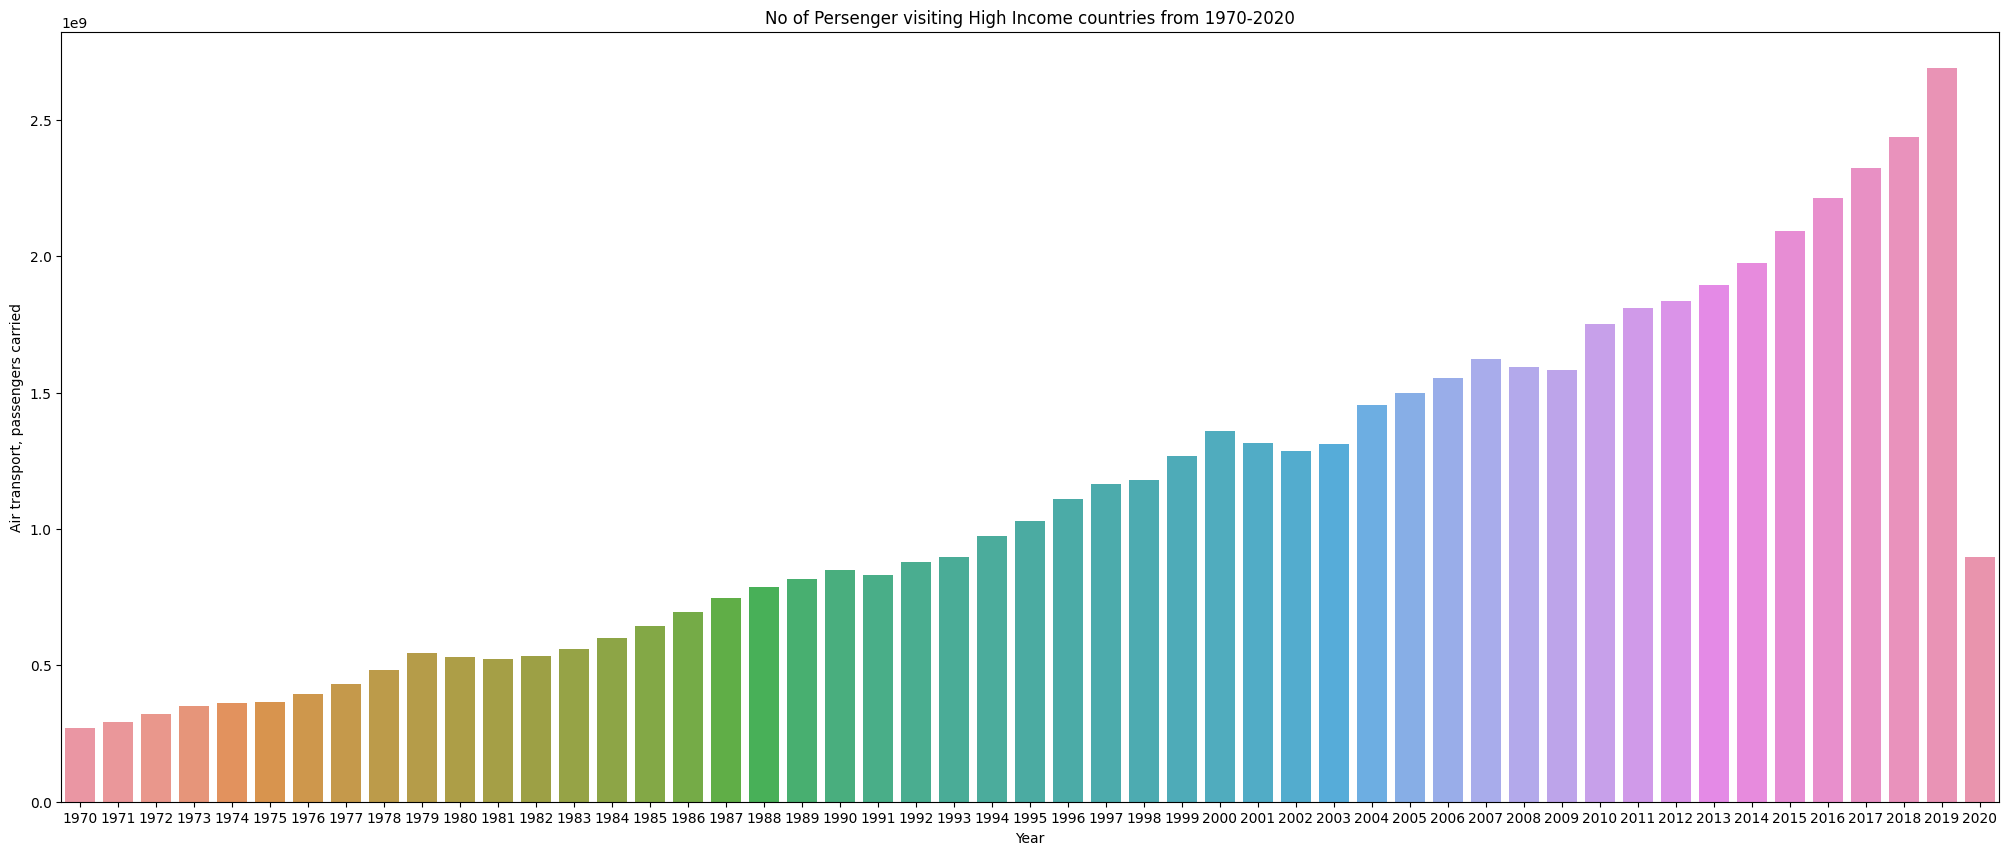

In [36]:
plt.figure(figsize = (25,10))
sns.barplot(data = high_income, x = 'Year', y = 'Air transport, passengers carried')
plt.title('No of Persenger visiting High Income countries from 1970-2020')

Text(0.5, 1.0, 'No of Persenger visiting Middle Income countries from 1970-2020')

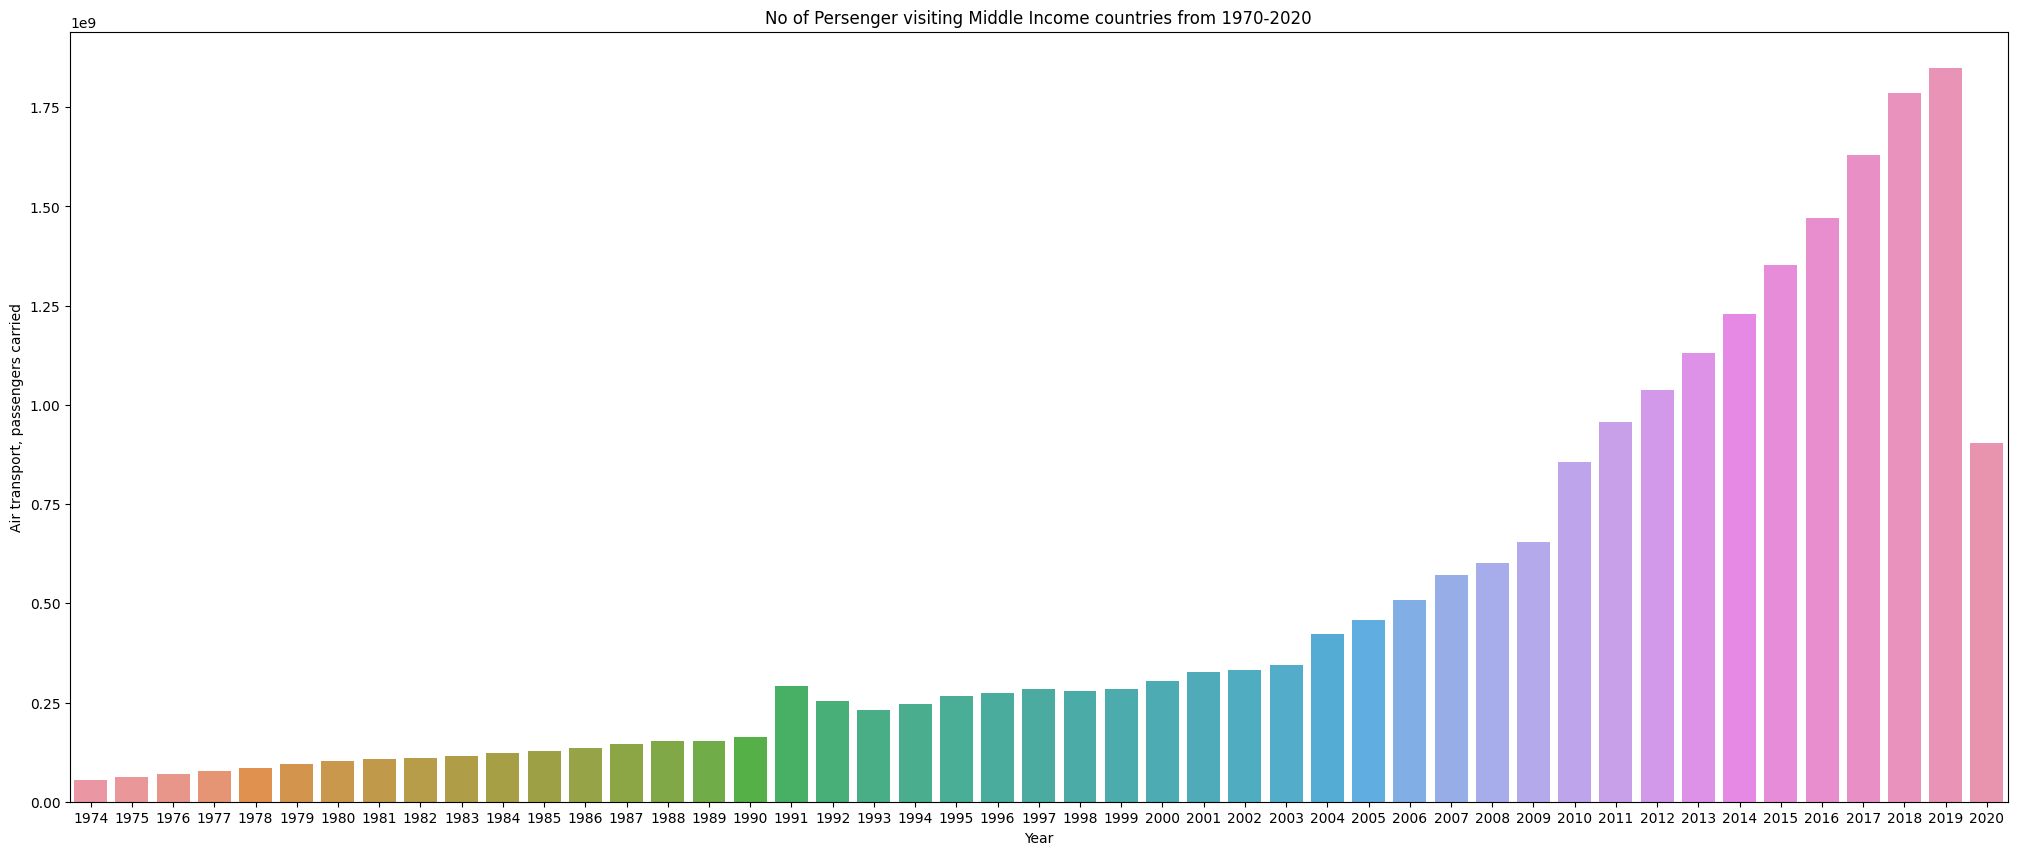

In [37]:
plt.figure(figsize = (25,10))
sns.barplot(data = middle_income, x = 'Year', y = 'Air transport, passengers carried')
plt.title('No of Persenger visiting Middle Income countries from 1970-2020')

Text(0.5, 1.0, 'No of Persenger visiting Upper Middle Income countries from 1970-2020')

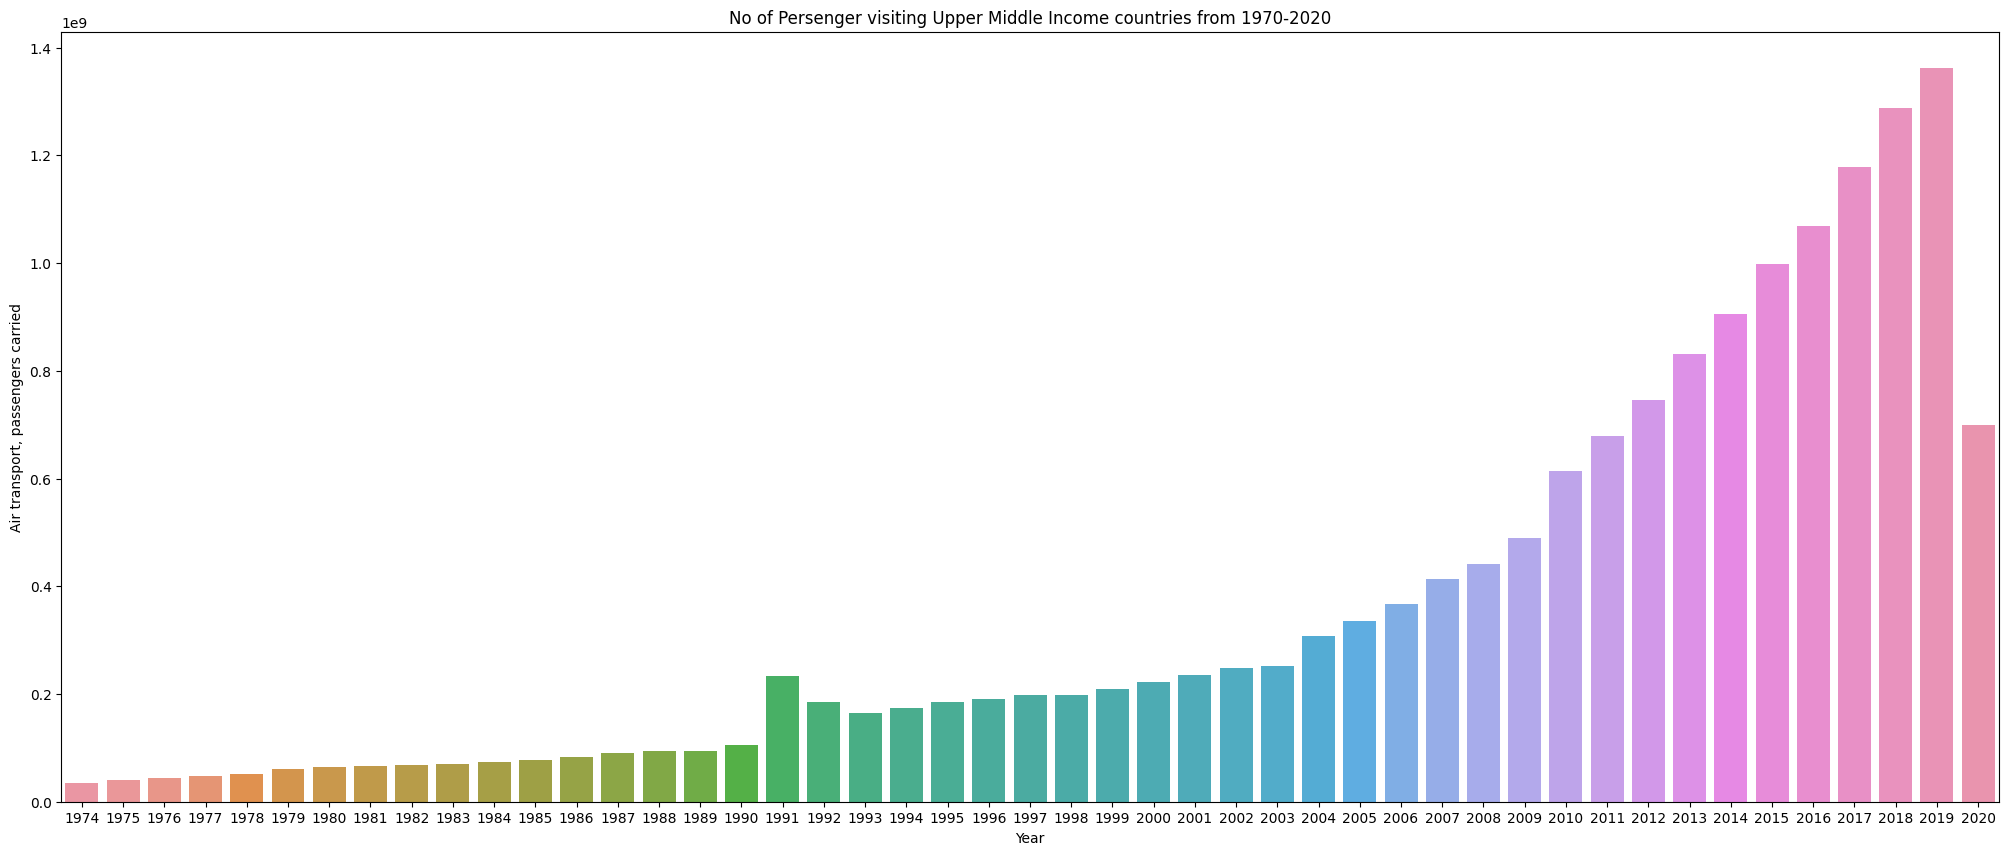

In [38]:
plt.figure(figsize = (25,10))
sns.barplot(data = upper_middle_income, x = 'Year', y = 'Air transport, passengers carried')
plt.title('No of Persenger visiting Upper Middle Income countries from 1970-2020')

Text(0.5, 1.0, 'No of Persenger visiting Lower Middle Income countries from 1970-2020')

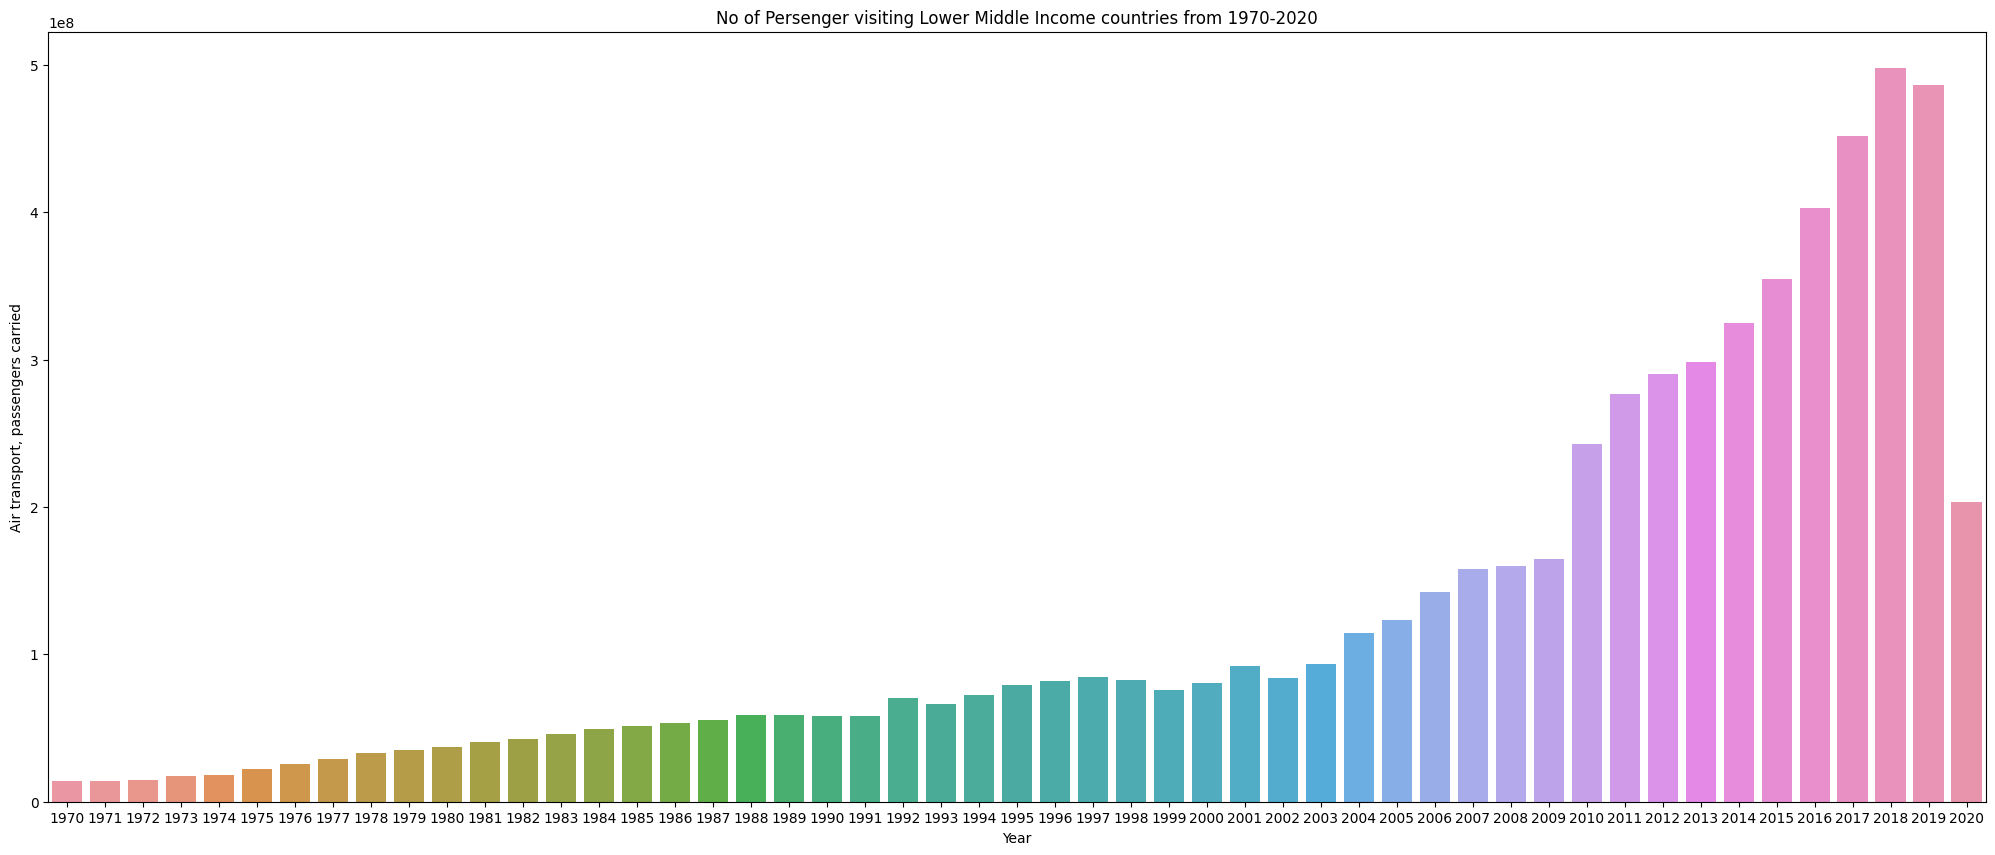

In [39]:
plt.figure(figsize = (25,10))
sns.barplot(data = lower_middle_income, x = 'Year', y = 'Air transport, passengers carried')
plt.title('No of Persenger visiting Lower Middle Income countries from 1970-2020')

Text(0.5, 1.0, 'No of Persenger visiting Low and Middle Income countries from 1970-2020')

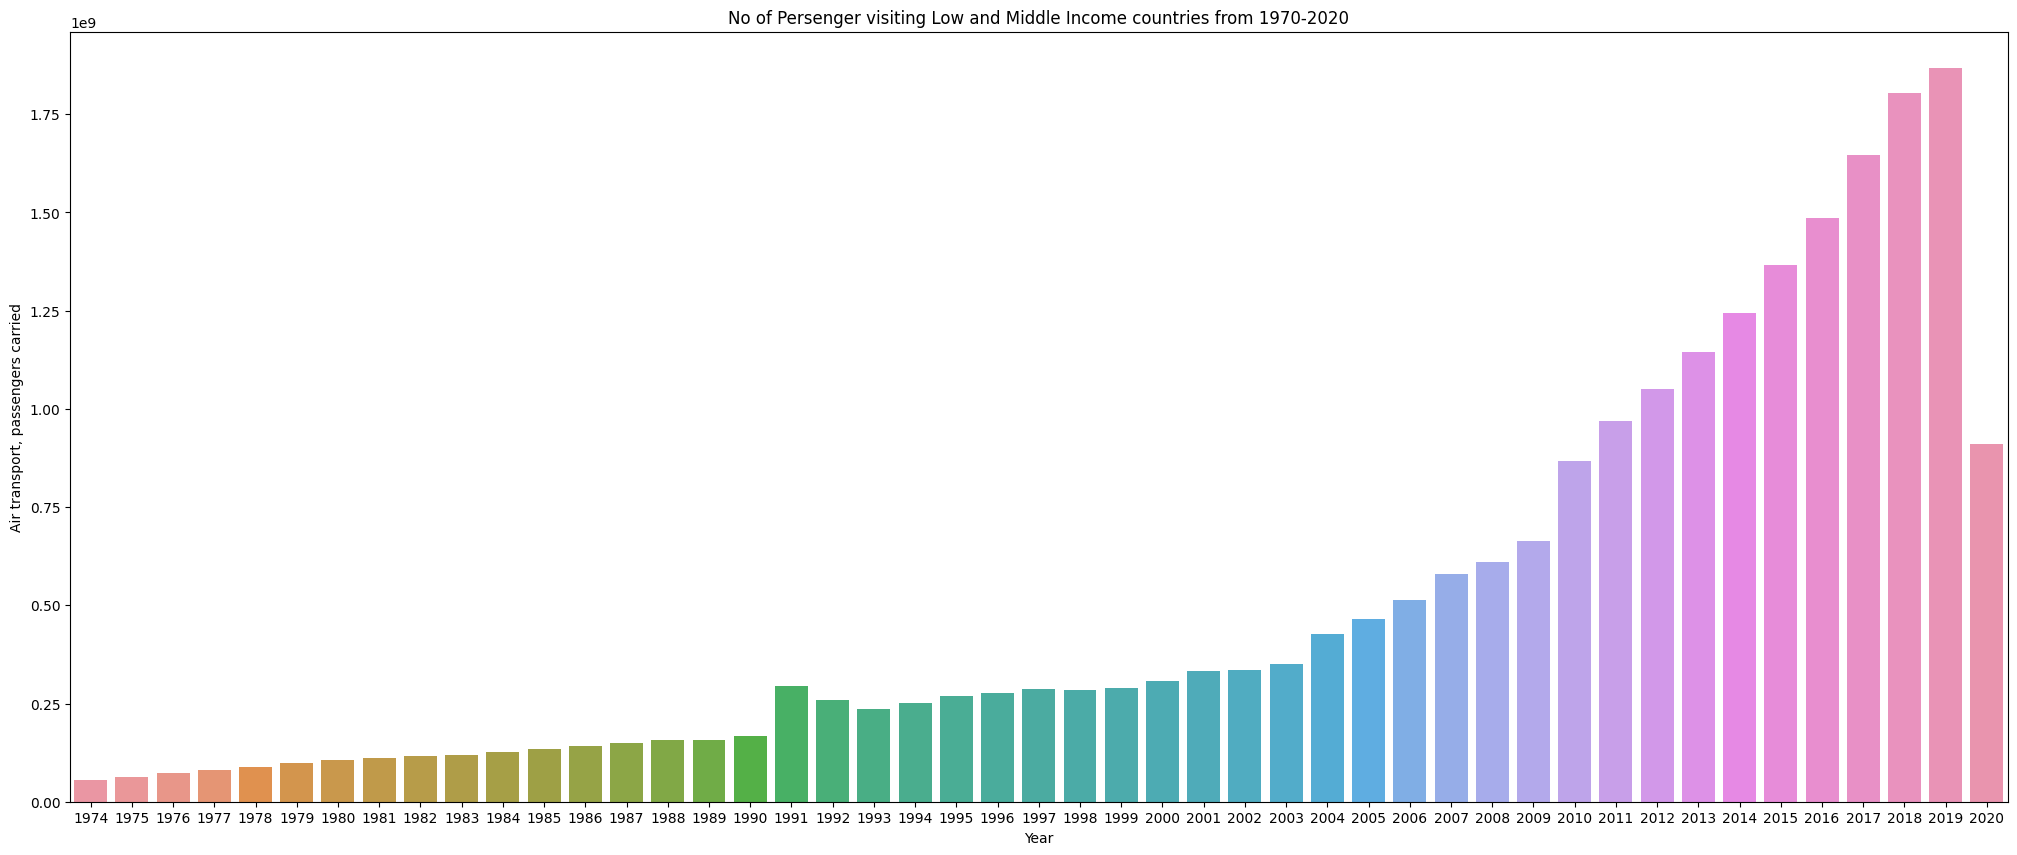

In [40]:
plt.figure(figsize = (25,10))
sns.barplot(data = low_and_middle_income, x = 'Year', y = 'Air transport, passengers carried')
plt.title('No of Persenger visiting Low and Middle Income countries from 1970-2020')

Text(0.5, 1.0, 'No of Persenger visiting Low Income countries from 1970-2020')

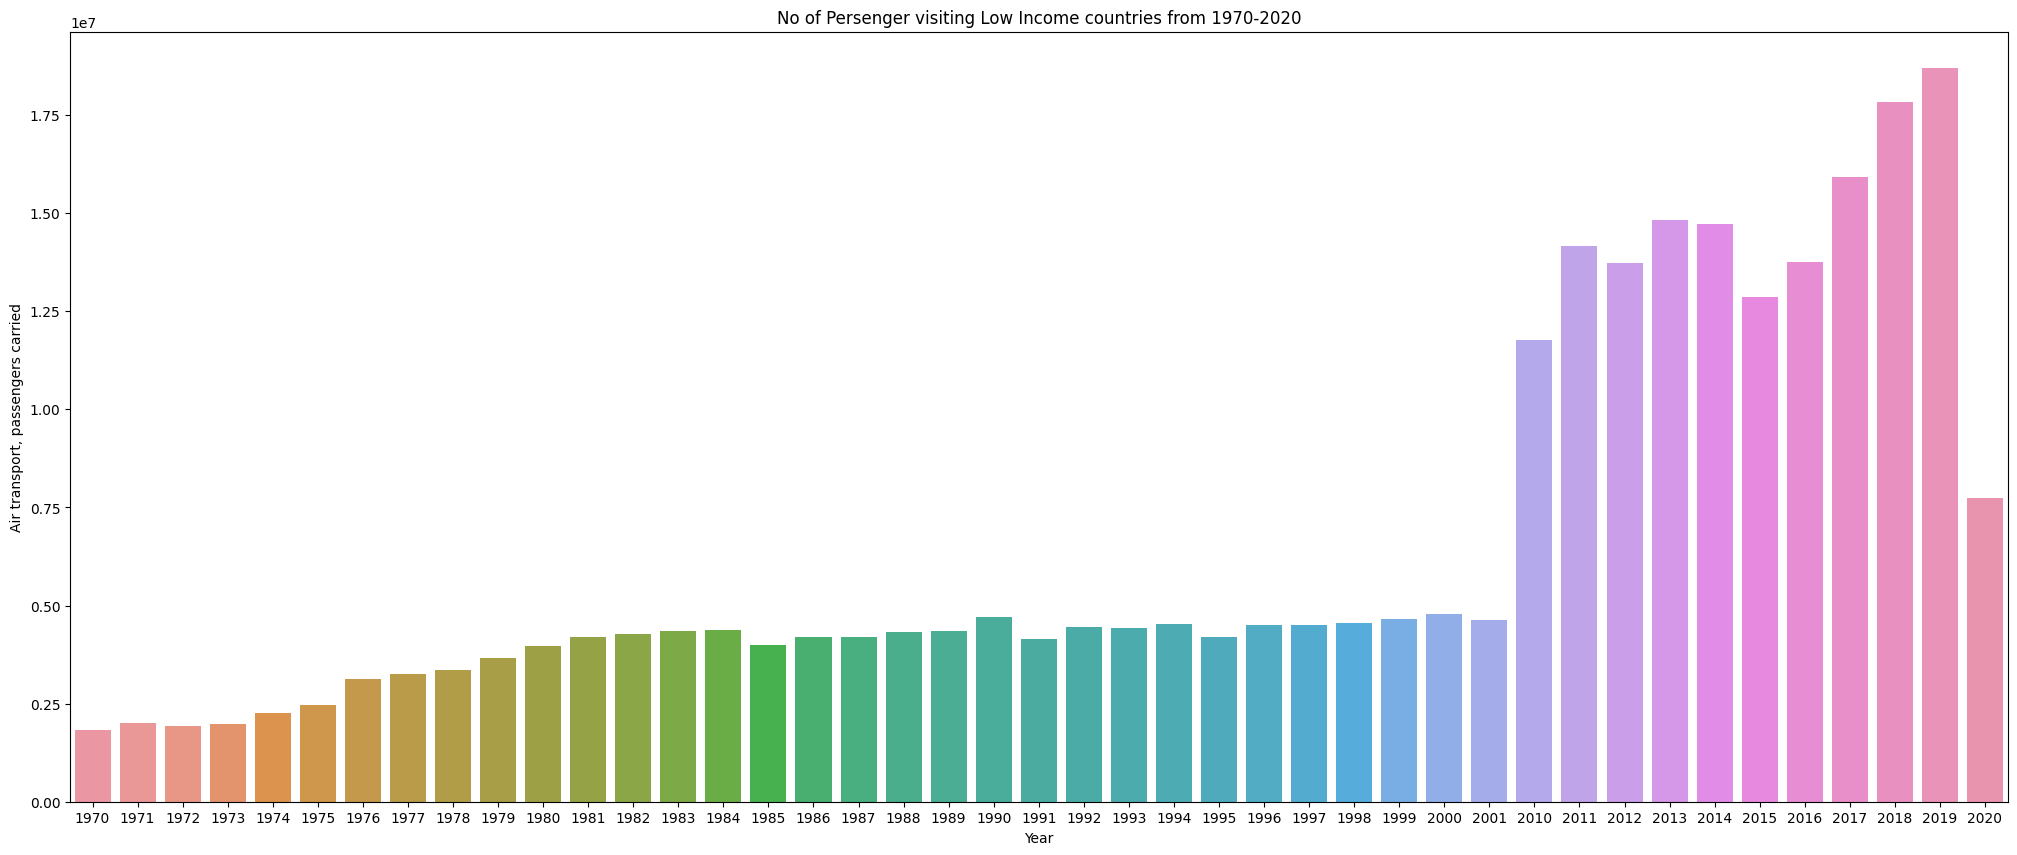

In [41]:
plt.figure(figsize = (25,10))
sns.barplot(data = low_income, x = 'Year', y = 'Air transport, passengers carried')
plt.title('No of Persenger visiting Low Income countries from 1970-2020')

<Axes: title={'center': 'Mean No of Tourists for each income Group'}, xlabel='Entity'>

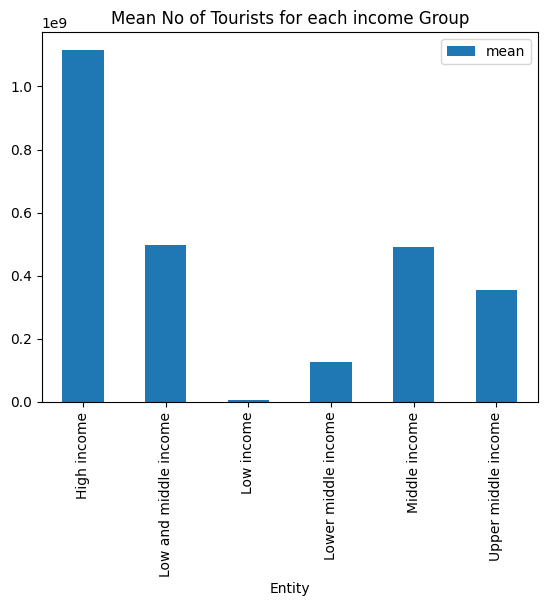

In [51]:
income_category.groupby('Entity').agg({'mean'})['Air transport, passengers carried'].plot(kind = 'bar', title = 'Mean No of Tourists for each income Group')